In [6]:
!pip install textblob
!pip install wordcloud
!python -m textblob.download_corpora
!pip install plotly
!pip install wordninja
!pip install pyspellchecker
!pip install pandas
!pip install seaborn

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp310-cp310-linux_x86_64.whl size=402361 sha256=0c0c4dbcab982a282804163b6b5e43ccf05e82684337a5a5e6f0ff5eb22b77f5
  Stored in directory: /home/am-i-helpful/.cache/pip/wheels/6b/b1/75/024072f28a2b9d6c4f80b35ebfd6ced7fd9fc58e9f1b933b9f
Successfully built wordcloud
You should consider upgrading via the '/home/am-i-helpful/PycharmProjects/Sentiment Analysis - COVID-19 Vaccine Tweets/venv/bin/python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px

In [3]:
df = pd.read_csv("vaccination_all_tweets.csv", quotechar='"', delimiter=',').dropna()
# dropna() for removing the missing values
df

id                                         user_name  \
0      1340539111971516416                                        Rachel Roh   
2      1337858199140118533                                          eli🇱🇹🇪🇺👌   
6      1337851215875608579                                 Gunther Fehlinger   
9      1337842295857623042                                      Ch.Amjad Ali   
10     1337841934170255365                                       Tamer Yazar   
...                    ...                                               ...   
27802  1368226947822653442  Andy The legally and popularly elected Gardener.   
27804  1368224770995675139                                        🌎 Sarwar 🌐   
27806  1368224272267829256                                 Workout Solutions   
27807  1368218905353859081                                      William Owen   
27808  1368212131422814208                                 Workout Solutions   

                        user_location  \
0           La Crescenta-Montrose, CA   
2                            Your Bed   
6         Austria, Ukraine and Kosovo   
9                           Islamabad   
10                      Turkey-Israel   
...                               ...   
27802                 Untidied States   
27804                               E   
27806  Toronto, Canada  and Worldwide   
27807                  Moscow, Russia   
27808  Toronto, Canada  and Worldwide   

                                        user_description         user_created  \
0      Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
2                                         heil, hydra 🖐☺  2020-06-25 23:30:28   
6      End North Stream 2 now - the pipeline of corru...  2013-06-10 17:49:22   
9      #ProudPakistani #LovePakArmy #PMIK @insafiansp...  2012-11-12 04:18:12   
10     Im Market Analyst, also Editor... working (fre...  2009-09-17 16:45:16   
...                                                  ...                  ...   
27802                       merciless infj door slammer.  2019-01-01 23:12:42   
27804                                     W pirsarwarras  2009-07-01 00:18:11   
27806  George Tsanis – Workout Solutions Health and F...  2010-09-20 17:01:08   
27807  | political | cats | bikes | civil rights | te...  2009-03-16 03:03:13   
27808  George Tsanis – Workout Solutions Health and F...  2010-09-20 17:01:08   

       user_followers  user_friends  user_favourites  user_verified  \
0                 405          1692             3247          False   
2                  10            88              155          False   
6                2731          5001            69344          False   
9                 671          2368            20469          False   
10               1302            78              339          False   
...               ...           ...              ...            ...   
27802              93            83             9876          False   
27804            1685          1439             6268          False   
27806            1164           172             1358          False   
27807            3962          2594            51923          False   
27808            1164           172             1358          False   

                      date                                               text  \
0      2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
2      2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
6      2020-12-12 20:06:00  it is a bit sad to claim the fame for success ...   
9      2020-12-12 19:30:33  #CovidVaccine \n\nStates will start getting #C...   
10     2020-12-12 19:29:07  while deaths are closing in on the 300,000 mar...   
...                    ...                                                ...   
27802  2021-03-06 15:48:19  If you want to know how much antivaxx disinfor...   
27804  2021-03-06 15:39:40  #BREAKING \n#Venezuela \nVenezuelan President ...   
27806  2021-03-

In [5]:
print(df.columns)
print(df.shape)
df.info()

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
(16180, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16180 entries, 0 to 27808
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                16180 non-null  int64 
 1   user_name         16180 non-null  object
 2   user_location     16180 non-null  object
 3   user_description  16180 non-null  object
 4   user_created      16180 non-null  object
 5   user_followers    16180 non-null  int64 
 6   user_friends      16180 non-null  int64 
 7   user_favourites   16180 non-null  int64 
 8   user_verified     16180 non-null  bool  
 9   date              16180 non-null  object
 10  text              16180 non-null  object
 11  hashta

In [6]:
# Data pre-processing
df.drop(columns=['id'], inplace=True)
df = df.drop_duplicates('text')
print(df.shape)

(16170, 15)


In [7]:
# use regular expressions to strip each tweet of mentions, hashtags, retweet information, and links
def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text

In [8]:
# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
df['text'].transform(clean_tweet_text)
df.head()

user_name                user_location  \
0          Rachel Roh    La Crescenta-Montrose, CA   
2            eli🇱🇹🇪🇺👌                     Your Bed   
6   Gunther Fehlinger  Austria, Ukraine and Kosovo   
9        Ch.Amjad Ali                    Islamabad   
10        Tamer Yazar                Turkey-Israel   

                                     user_description         user_created  \
0   Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
2                                      heil, hydra 🖐☺  2020-06-25 23:30:28   
6   End North Stream 2 now - the pipeline of corru...  2013-06-10 17:49:22   
9   #ProudPakistani #LovePakArmy #PMIK @insafiansp...  2012-11-12 04:18:12   
10  Im Market Analyst, also Editor... working (fre...  2009-09-17 16:45:16   

    user_followers  user_friends  user_favourites  user_verified  \
0              405          1692             3247          False   
2               10            88              155          False   
6             2731          5001            69344          False   
9              671          2368            20469          False   
10            1302            78              339          False   

                   date                                               text  \
0   2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
2   2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
6   2020-12-12 20:06:00  it is a bit sad to claim the fame for success ...   
9   2020-12-12 19:30:33  #CovidVaccine \n\nStates will start getting #C...   
10  2020-12-12 19:29:07  while deaths are closing in on the 300,000 mar...   

                                             hashtags               source  \
0                                  ['PfizerBioNTech']  Twitter for Android   
2   ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
6                                     ['vaccination']      Twitter Web App   
9   ['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...      Twitter Web App   
10                      ['PfizerBioNTech', 'Vaccine']      Twitter Web App   

    retweets  favorites  is_retweet  
0          0          0       False  
2          0          0       False  
6          0          4       False  
9          0          0       False  
10         0          0       False

In [9]:
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

user_name                user_location  \
0          Rachel Roh    La Crescenta-Montrose, CA   
2            eli🇱🇹🇪🇺👌                     Your Bed   
6   Gunther Fehlinger  Austria, Ukraine and Kosovo   
9        Ch.Amjad Ali                    Islamabad   
10        Tamer Yazar                Turkey-Israel   

                                     user_description         user_created  \
0   Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
2                                      heil, hydra 🖐☺  2020-06-25 23:30:28   
6   End North Stream 2 now - the pipeline of corru...  2013-06-10 17:49:22   
9   #ProudPakistani #LovePakArmy #PMIK @insafiansp...  2012-11-12 04:18:12   
10  Im Market Analyst, also Editor... working (fre...  2009-09-17 16:45:16   

    user_followers  user_friends  user_favourites  user_verified        date  \
0              405          1692             3247          False  2020-12-20   
2               10            88              155          False  2020-12-12   
6             2731          5001            69344          False  2020-12-12   
9              671          2368            20469          False  2020-12-12   
10            1302            78              339          False  2020-12-12   

                                                 text  \
0   Same folks said daikon paste could treat a cyt...   
2   #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
6   it is a bit sad to claim the fame for success ...   
9   #CovidVaccine \n\nStates will start getting #C...   
10  while deaths are closing in on the 300,000 mar...   

                                             hashtags               source  \
0                                  ['PfizerBioNTech']  Twitter for Android   
2   ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
6                                     ['vaccination']      Twitter Web App   
9   ['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...      Twitter Web App   
10                      ['PfizerBioNTech', 'Vaccine']      Twitter Web App   

    retweets  favorites  is_retweet  
0          0          0       False  
2          0          0       False  
6          0          4       False  
9          0          0       False  
10         0          0       False

In [11]:
# Exploratory Data Analysis
df. describe()
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

user_followers   user_friends  user_favourites      retweets  \
count    1.617000e+04   16170.000000     16170.000000  16170.000000   
mean     1.719752e+05    1518.035931     14619.516079      4.241187   
std      1.141814e+06    7640.144298     37054.083845     45.617605   
min      0.000000e+00       0.000000         0.000000      0.000000   
25%      2.180000e+02     170.000000       426.000000      0.000000   
50%      9.470000e+02     492.500000      2377.000000      0.000000   
75%      4.284000e+03    1372.750000     11847.250000      1.000000   
max      1.486666e+07  380428.000000    686342.000000   2360.000000   

          favorites  
count  16170.000000  
mean      18.428386  
std      246.240119  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        5.000000  
max    22815.000000

<AxesSubplot:>

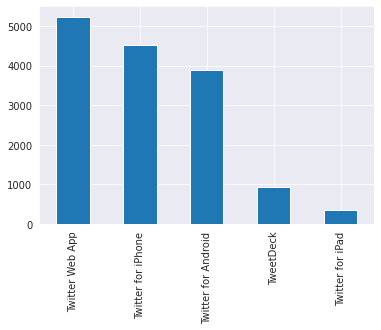

In [12]:
# which device are people tweeting about the vaccine from?
df['source'].value_counts().head(n=5).plot.bar()

<AxesSubplot:>

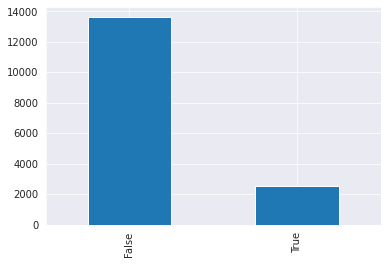

In [13]:
df['user_verified'].value_counts().head(n=10).plot.bar()

In [14]:
df[df['user_verified'] == True].head()

user_name    user_location  \
15         City A.M.  London, England   
17             ILKHA          Türkiye   
22         City A.M.  London, England   
43         City A.M.  London, England   
44  Daily News Egypt            Egypt   

                                     user_description         user_created  \
15  London's business newspaper - News, Opinion, a...  2009-06-09 13:53:06   
17     Official Twitter account of Ilke News Agency /  2015-05-22 08:31:12   
22  London's business newspaper - News, Opinion, a...  2009-06-09 13:53:06   
43  London's business newspaper - News, Opinion, a...  2009-06-09 13:53:06   
44  Egypt's Only Daily Independent Newspaper in En...  2009-04-26 07:56:24   

    user_followers  user_friends  user_favourites  user_verified        date  \
15           66224           603              771           True  2020-12-12   
17            4056             6                3           True  2020-12-12   
22           66224           603              771           True  2020-12-12   
43           66224           603              771           True  2020-12-12   
44          278080           116              765           True  2020-12-12   

                                                 text  \
15  Trump announces #vaccine rollout 'in less than...   
17  Coronavirus: Iran reports 8,201 new cases, 221...   
22  Trump announces #vaccine rollout 'in less than...   
43  Trump announces #vaccine rollout 'in less than...   
44  #FDA authorizes #PfizerBioNTech #coronavirus v...   

                                     hashtags              source  retweets  \
15                                ['vaccine']  Twitter for iPhone         0   
17  ['Iran', 'coronavirus', 'PfizerBioNTech']           TweetDeck         3   
22                                ['vaccine']              Buffer         1   
43                                ['vaccine']     Twitter Web App         0   
44   ['FDA', 'PfizerBioNTech', 'coronavirus']     Twitter Web App         1   

    favorites  is_retweet  
15          1       False  
17          5       False  
22          0       False  
43          2       False  
44          1       False

In [15]:
# what are the top 10 most retweeted tweets
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

text  \
17118                                        Got my jab. For the curious, it was #Covaxin. \n\nFelt secure, will travel safely. https://t.co/8PL7PZMEsf   
7126   New research published in Microbiology &amp; Infectious Diseases, immunologist J. Bart Classen warns #mRNA technology u… https://t.co/OWUTf5ShHO   
26737      #Covaxin 🇮🇳 , made by Hyderabad-based Bharat Biotech International Limited, has been declared "Safe, Immunogenic wi… https://t.co/FAUOEHJmAw   
17543      Prime Minister Narendra Modi choose early morning time to take #covaxin . No traffic was stopped . Traveled normall… https://t.co/udxAqk9xEC   
27709    This is not a queue for a Covid vaccine\nThis is a queue at a food bank today in the UK.\n#coronavirus #oxfordvaccine… https://t.co/rGqg14FT9t   
20965                                            #BREAKING : Bharat Biotech says its #Covaxin shows interim clinical efficacy of 81% in Phase 3 results   
20575                  It is tough when have to play the sauve Amrikan doctor but ur desi Lahore genes start acting up #Covaxin https://t.co/ZUygPW4WGd   
13101      AIIMS nurse who gave the #Covaxin jab to Prime Minister @narendramodi speaks to the national broadcaster DD News ab… https://t.co/ivPj4KGiyE   
21568      The Opposition campaign to denigrate #Covaxin is disgraceful. So is the refusal by a coterie of senior editors, col… https://t.co/yN6M1BxvCn   
20964                                         Phase 3 Results of #COVAXIN - announced by @BharatBiotech : Demonstrates Interim Clinical Efficacy of 81%   

             date             user_name               user_location  \
17118  2021-03-01     Dr. S. Jaishankar            New Delhi, India   
7126   2021-02-10  Robert F. Kennedy Jr      Los Angles, California   
26737  2021-03-09        Megh Updates 🚨      Turn on Notification 🔔   
17543  2021-03-01        Megh Updates 🚨      Turn on Notification 🔔   
27709  2021-03-08       Afshin Rattansi                      London   
20965  2021-03-03        Megh Updates 🚨      Turn on Notification 🔔   
20575  2021-03-03           Manoj Rawat                   New Delhi   
13101  2021-03-01       Aditya Raj Kaul            New Delhi, India   
21568  2021-03-05       Minhaz Merchant                      Mumbai   
20964  2021-03-03     Prof Shamika Ravi  New Delhi, Kannauj, Kohima   

                               hashtags  favorites  retweets  
17118                       ['Covaxin']      22815      2360  
7126                           ['mRNA']       3090      2247  
26737                       ['Covaxin']       9457      2092  
17543                       ['covaxin']       8153      1980  
27709  ['coronavirus', 'oxfordvaccine']       1713      1514  
20965           ['BREAKING', 'Covaxin']       6651       938  
20575                       ['Covaxin']       3636       922  
13101                       ['Covaxin']       5827       870  
21568                       ['Covaxin']       2311       806  
20964                       ['COVAXIN']       5575       773

In [16]:
df.sort_values(by=['date', 'favorites'], ascending=[True, False])[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

text  \
35                              An immigrant Muslim couple find the COVID-19 Vaccine. \n\n#CovidVaccine #PfizerBioNTech #Pfizervaccine #PfizerProud   
293                 #UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/xvwUEvZZk2   
25   No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgovuk and #PfizerBioNTech @pfizer for making the #CovidVaccine dream poss… https://t.co/3KvJ7UP432   
17           Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours #Iran #coronavirus #PfizerBioNTech… https://t.co/mwDNAdmb7F   
298                 #UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/Lyq594UEks   
6       it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP   
301    I am beyond relieved to share that I’ll be among the first to receive the #CovidVaccine from #PfizerBioNTech. Thank… https://t.co/1py4jUhGzU   
18     .@Pfizer will rake in billions from its expensive #CovidVaccine but @AlbertBourla refuses to cut the price for lowe… https://t.co/eC94w3TUl0   
16      UPDATED: #YellowFever &amp; #COVID19 #ImmunityPassports - Part Two\n\n#SARSCoV2 #PfizerBioNtech #Britain #December… https://t.co/qKT7Rst9aW   
21     Anyone wondering why day after #PfizerBioNTech approval in the UK people were getting vaccinated but all we are tol… https://t.co/tPSyL9CUYE   

           date                    user_name                user_location  \
35   2020-12-12  Shahjhan Malik | #WearAMask     Nottinghamshire, England   
293  2020-12-12                      DD News             New Delhi, India   
25   2020-12-12              Devan Surendran          Nottingham, England   
17   2020-12-12                        ILKHA                      Türkiye   
298  2020-12-12                     DD India             New Delhi, India   
6    2020-12-12            Gunther Fehlinger  Austria, Ukraine and Kosovo   
301  2020-12-12     Taryn Schuelke, CT, CCLS                  Houston, TX   
18   2020-12-12        Braderz73🌹#GTTO 🇪🇺 🇬🇧                  Bristol, UK   
16   2020-12-12           STOPCOMMONPASS.ORG                       Global   
21   2020-12-12            Richard Dunne, MD                Rochester, NY   

                                                                                                 hashtags  \
35                                     ['CovidVaccine', 'PfizerBioNTech', 'Pfizervaccine', 'PfizerProud']   
293                                                                                      ['UnitedStates']   
25                                                      ['ThankYouNHS', 'PfizerBioNTech', 'CovidVaccine']   
17                                                              ['Iran', 'coronavirus', 'PfizerBioNTech']   
298                                                                                      ['UnitedStates']   
6                                                                                         ['vaccination']   
301                                                                    ['CovidVaccine', 'PfizerBioNTech']   
18                                                                                       ['CovidVaccine']   
16   ['YellowFever', 'COVID19', 'ImmunityPassports', 'SARSCoV2', 'PfizerBioNtech', 'Britain', 'December']   
21                                                                                     ['PfizerBioNTech']   

     favorites  retweets  
35          37         2  
293         21         4  
25          10         1  
17           5         3  
298          5         0  
6            4         0  
301          4         2  
18           3         3  
16           2         2  
21           2         0

In [18]:
# Sentiment Analysis
testimonial = TextBlob("So excited to get my vaccine!")
print(testimonial.sentiment)
testimonial = TextBlob("Is the vaccine painful?")
print(testimonial.sentiment)
testimonial = TextBlob("The Pfizer vaccine is now FDA approved")
print(testimonial.sentiment)

# testing my own random words for fun
testimonial = TextBlob("What the fuck!")
print(testimonial.sentiment)
testimonial = TextBlob("Oh my goodness!")
print(testimonial.sentiment)

Sentiment(polarity=0.46875, subjectivity=0.75)
Sentiment(polarity=-0.7, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)


In [19]:
# let's apply the TextBlob API onto our tweet data to perform sentiment analysis!
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

user_name                user_location  \
0          Rachel Roh    La Crescenta-Montrose, CA   
2            eli🇱🇹🇪🇺👌                     Your Bed   
6   Gunther Fehlinger  Austria, Ukraine and Kosovo   
9        Ch.Amjad Ali                    Islamabad   
10        Tamer Yazar                Turkey-Israel   

                                                                                                                                                    user_description  \
0                                                   Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻   
2                                                                                                                                                     heil, hydra 🖐☺   
6   End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped   
9                                        #ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad   
10     Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram :  tamervisits -   

           user_created  user_followers  user_friends  user_favourites  \
0   2009-04-08 17:52:46             405          1692             3247   
2   2020-06-25 23:30:28              10            88              155   
6   2013-06-10 17:49:22            2731          5001            69344   
9   2012-11-12 04:18:12             671          2368            20469   
10  2009-09-17 16:45:16            1302            78              339   

    user_verified        date  \
0           False  2020-12-20   
2           False  2020-12-12   
6           False  2020-12-12   
9           False  2020-12-12   
10          False  2020-12-12   

                                                                                                                                              text  \
0                                                Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF   
2     #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P   
6      it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP   
9   #CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w   
10  while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP   

                                                                                   hashtags  \
0                                                                        ['PfizerBioNTech']   
2       ['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']   
6                                                                           ['vaccination']   
9   ['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']   
10                                                            ['PfizerBioNTech', 'Vaccine']   

                 source  retweets  favorites  is_retweet  polarity  \
0   Twitter for Android         0          0       False      0.00   
2   Twitter for Android         0          0       False      0.00   
6       Twitter Web App         0          4       False     -0.10   
9       Twitter Web App         0          0       False      0.00   
10      Twitter Web App         0          0       False      0.25   

    subjectivity  
0       0.125000  
2       0.033333  
6       0.500000  
9       0.000000  
10      0.333333

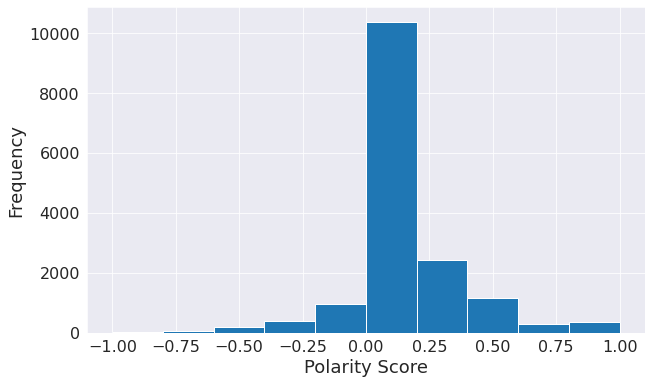

In [21]:
fig = plt.figure(figsize=(10, 6))
df['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("./polarity_hist.png")

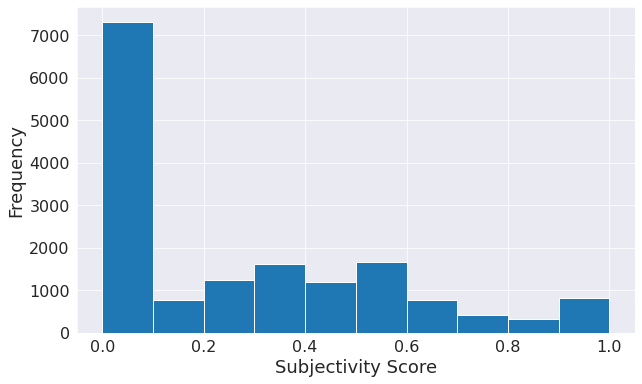

In [22]:
fig = plt.figure(figsize=(10, 6))
df['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("./subjectivity_hist.png")

In [23]:
# inspect the most negatively charged tweets
df.sort_values(by='polarity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0                              @AblemanAdam Terrible! Thank-you! And here in Canada @JustinTrudeau still will not call Russia for some #SputnikV   
1                                                            Pharmaceutical greed at its worst...\n\n#PfizerBioNTech \n\nhttps://t.co/nT98jdzMlj   
2  Day 4 w/#Moderna (shot 1)..\nugh, i'm miserable, but ironically i have never had any injection site pain or swelling… https://t.co/H8jo9i4wl8   
3   #Moderna side effects were terrible head aches and sore arm/injection site. The head aches may have been bc I was i… https://t.co/AWnTJP3LZB   
4    Outrageous that #Moderna #vaccine not approved in #Japan weeks ago. This isn’t the fault of #Moderna or the #EU or… https://t.co/UI0RtbMkJW   
5   Death of 23 people's in #Norway after receiving #PfizerBioNTech vaccine is pathetic and scarry too!! Autopsy report… https://t.co/N36GJTVDPP   
6   @ShamikaRavi @BharatBiotech Shocking #clinicaltrials of COVAXIN #COVID19Vaccine. Signs of #Covaxin recipients taken… https://t.co/kWLuW6tz0i   
7   @gurpreetscheema @Milan_reports @BharatBiotech @IndiaToday Shocking #clinicaltrials of COVAXIN #COVID19Vaccine. Sig… https://t.co/1Baj3QqeRk   
8                                       #PfizerBioNTech #Vaccin #COVID19 #Moderna \nWHAT THE FUCK !!!!!!\n😂😂😂😂🤣🤣🤣🤣🤣😱😱😱😱😱 https://t.co/NaPnpvhY5W   
9   Got my #Moderna Covid-19 vaccine dose 2 yesterday and today I feel like crap! 🤕 I do feel blessed to have had the o… https://t.co/8WfXUodIJJ   

   polarity  subjectivity  
0      -1.0           1.0  
1      -1.0           1.0  
2      -1.0           1.0  
3      -1.0           1.0  
4      -1.0           1.0  
5      -1.0           1.0  
6      -1.0           1.0  
7      -1.0           1.0  
8      -1.0           0.6  
9      -1.0           0.8

In [25]:
# inspect the most positively charged tweets
df.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0                                         Help us win this battle - Register to get yours ! #covid19 #PfizerBioNTech #HDF https://t.co/rVbjIfQvIX   
1    Questions in 🇧🇦 on whether the authorities agreed on the best conditions when buying #SputnikV🇷🇺 vaccines continue.… https://t.co/74RsA9KxwM   
2                                                          This would be great news!\n#COVID19 #vaccines #Pfizer #Moderna https://t.co/s8QCK50Pbp   
3    He took #COVAXIN, against which a lot of misinformation was spread even when it was scientifically perfect. I think… https://t.co/0RyKiFMK6l   
4                                                                                             Great!\n#Covaxin \n#COVID19 https://t.co/KTVPEYTHFR   
5               @ARanganathan72 Excellent work #Bharat 👏\n#Covaxin \n\nCan we help our forever skeptics &amp; critics as… https://t.co/ppBYyIWKeK   
6  #Covid19 Excellent news 👏👏👏\nCongratulations @BharatBiotech\n\nExpert panel recommends dropping ‘clinical trial mode’… https://t.co/eqjhQUe0Px   
7     I'm thoroughly impressed by PM @narendramodi's commitment. He took the #COVAXIN shot by #BharatBiotech, leading by… https://t.co/eQUlWc92Wb   
8    Very happy to have been given the 1st dose of the #PfizerBioNTech #CovidVaccine today at @NewcastleHosps RVI. Amazi… https://t.co/SkMCQzlZZA   
9                                                           Just got vaccinated, and feel great about it! #moderna dose 1 https://t.co/RhkBKukPfz   

   polarity  subjectivity  
0       1.0          0.40  
1       1.0          0.30  
2       1.0          0.75  
3       1.0          1.00  
4       1.0          0.75  
5       1.0          1.00  
6       1.0          1.00  
7       1.0          1.00  
8       1.0          1.00  
9       1.0          0.75

In [26]:
# inspect the most subjective tweets (NOTE: subjectivity scale ranges from 0 to 1)
df.sort_values(by='subjectivity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0              2nd vaccine received today, thank you @OUHospitals #PfizerBioNTech #covid19 #OneTeamOneOUH #NurseTwitter https://t.co/OoTZpQCQq8   
1                                   article #compares #benefits of #Pfizer, #Moderna and #Johnson and Johnson #vaccines https://t.co/FaNr6YgI2W   
2  #Thursday “Ok. I was watching @12News it says the “#johnsonandjohnson #COVID19Vaccine is a one shot vaccine. Howeve… https://t.co/nx1HoyM8GL   
3                                                           Hey #Chicago..\n\nHeads up ! #COVID19  vaccine.\n\n#Moderna https://t.co/0O8Wmo92Ac   
4  For everyone passing on the #Moderna and #Pfizer vaccines to wait for the #johnsonandjohnson vaccine, please rememb… https://t.co/ChLtt6XWOv   
5      The complexities of international politics hit #publichealth and #humanrights once again: \n\nSurplus #doses of… https://t.co/nxIXuDzWWb   
6                                                                 $MRNA 🇺🇸 #Moderna expects $18.4 billion in 2021 sales https://t.co/ToP0BXS1bh   
7                             @CDCgov is lower back pain a side effect of the @moderna_tx COVID vaccine cause...\n\nOw #COVID19Vaccine #Moderna   
8                                                                          Also I got second dose #COVIDVaccine  today #modernavaccine #Moderna   
9                                                                                       Jean Marie will #Moderna-ize me https://t.co/4wfFqOmv28   

   polarity  subjectivity  
0       0.0           0.0  
1       0.0           0.0  
2       0.0           0.0  
3       0.0           0.0  
4       0.0           0.0  
5       0.0           0.0  
6       0.0           0.0  
7       0.0           0.0  
8       0.0           0.0  
9       0.0           0.0

In [27]:
# inspect the most objective tweets
df.sort_values(by='subjectivity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0   @Pfizer_France Here's manufacture @Pfizer_France #PfizerBioNTech ! @SanofiFR changes : 3 months to make it ! We don… https://t.co/lDNPYF5wyw   
1    @KyleClark @nexton9news Important #COVID19 #vaccine question: Can someone who already received #Pfizer or #Moderna… https://t.co/MFJY5TxVsf   
2     Covid: India could play an important role in producing vaccines https://t.co/RYZ9dyOXJY\n\n@Ocugen #BharatBiotech… https://t.co/vDTCpJJveH   
3      Covid-19 Vaccine: Only 1 in 10 Take Jab After Four Weeks\n\n#vaccine #COVID19 #coronavirus #CoronaVaccine #India… https://t.co/K1YpYKcxJ5   
4  Quote for today\nSayin' it as it is!\n#DollyParton #inspirational #Acceptance #nolimits #Moderna #jobsearcg #GoForIt… https://t.co/Gp8sSuGqVc   
5                           Finally got my vaccine today it hurt like a bitch and she even drew blood 😢 😝 #COVIDVaccination #oxfordastrazeneca 💉   
6                       #SputnikV in India is &gt; 10 and in #Pakistan, only the businessman friend of #ImranKhan knows. https://t.co/zBTskSQ4uN   
7      Never have I seen a group of people so happy in a pharmacy before or people so happy to get shots. #CovidVaccine… https://t.co/Rx7mHzGSUs   
8   @CBCNews Mayor of Nice in France asks health authorities to permit him to buy Russia #COVID19 vaccine #SputnikV, Wh… https://t.co/GZw9G5fhnN   
9                                     I got the shot! #Moderna Relieved and happy to finally see the end for all of us 🙏 https://t.co/DTQFrAJwxH   

   polarity  subjectivity  
0     0.625           1.0  
1     0.400           1.0  
2     0.400           1.0  
3     0.000           1.0  
4     0.500           1.0  
5     0.000           1.0  
6     0.000           1.0  
7     0.800           1.0  
8     0.600           1.0  
9     0.400           1.0

In [28]:
# let's inspect how many tweets there were with respect to time
timeline = df.groupby(['date']).count().reset_index()
timeline['count'] = timeline['text']
timeline = timeline[['date', 'count']]
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Tweet Count'})
fig.show()

In [29]:
# Time-Series Sentiment Analysis
# polarity values ranging from -1 to 1 are really useful for sentiment analysis
# but let's convert our data to 3 classes (negative, neutral, and positive) so that we can visualize it
criteria = [df['polarity'].between(-1, -0.01), df['polarity'].between(-0.01, 0.01), df['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
df['sentiment'] = np.select(criteria, values, 0)

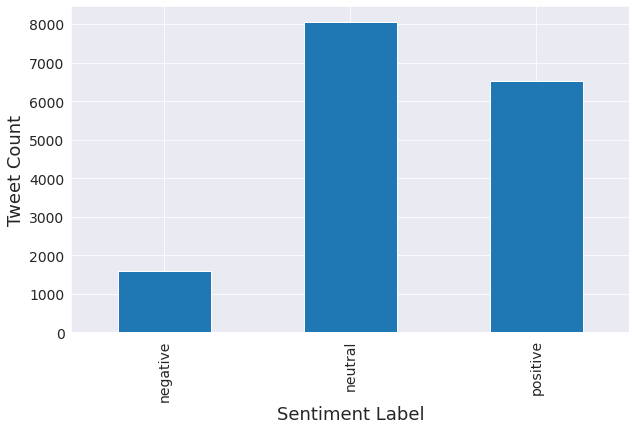

<Figure size 432x288 with 0 Axes>

In [31]:
# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()
fig.savefig("./sentiment_value_counts", bbox_inches='tight');

In [32]:
timeline = df.groupby(['date']).agg(np.nanmean).reset_index()
timeline['count'] = df.groupby(['date']).count().reset_index()['retweets']
timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
timeline["polarity"] = timeline["polarity"].astype(float)
timeline["subjectivity"] = timeline["subjectivity"].astype(float)
timeline

date  count  polarity  retweets  favorites  subjectivity
0   2020-12-12     38  0.034952  0.631579   2.868421      0.227801
1   2020-12-13     52  0.055937  1.942308   7.500000      0.255696
2   2020-12-14     83  0.116874  4.698795  29.204819      0.267803
3   2020-12-15     87  0.094041  1.022989   7.333333      0.258078
4   2020-12-16     78  0.104020  1.000000   5.115385      0.248872
..         ...    ...       ...       ...        ...           ...
88  2021-03-10    465  0.098784  2.481720   9.987097      0.246851
89  2021-03-11    516  0.081946  2.232558   9.248062      0.253772
90  2021-03-12    467  0.108128  1.391863   8.509636      0.259496
91  2021-03-13    315  0.088139  3.161905  11.838095      0.290822
92  2021-03-14     83  0.091934  1.349398   3.060241      0.256714

[93 rows x 6 columns]

In [33]:
# Plot tweets over time, color-coded by average polarity score
fig = px.bar(timeline, x='date', y='count', color='polarity')
fig.show()

In [34]:
# # Plot tweets over time, color-coded by average subjectivity score
fig = px.bar(timeline, x='date', y='count', color='subjectivity')
fig.show()

In [35]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine-- not very helpful!
def filter_by_vaccy(df, vax):
    df_filt = pd.DataFrame()
    for v in vax:
        df_filt = df_filt.append(df[df['text'].str.lower().str.contains(v)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
#     df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date']).agg(np.nanmean).reset_index()
    timeline['count'] = df_filt.groupby(['date']).count().reset_index()['retweets']
    timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
    timeline["polarity"] = timeline["polarity"].astype(float)
    timeline["subjectivity"] = timeline["subjectivity"].astype(float)
    return df_filt, timeline

In [36]:
pfizy_df, pfizy_timeline = filter_by_vaccy(df, ['pfizer', 'biontech'])
print(pfizy_df.shape)
fig = px.bar(pfizy_timeline, x='date', y='count', color='polarity')
fig.show()

/tmp/ipykernel_58814/2136394285.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_58814/2136394285.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



(5454, 18)


In [37]:
moderna_df, moderna_timeline = filter_by_vaccy(df, ['moderna'])
print(moderna_df.shape)
fig = px.bar(moderna_timeline, x='date', y='count', color='polarity')
fig.show()

(2604, 18)


/tmp/ipykernel_58814/2136394285.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [44]:
# Word-clouds section
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add("amp")

[nltk_data] Downloading package wordnet to /home/am-i-
[nltk_data]     helpful/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/am-i-
[nltk_data]     helpful/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/am-i-
[nltk_data]     helpful/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


(-0.5, 999.5, 499.5, -0.5)

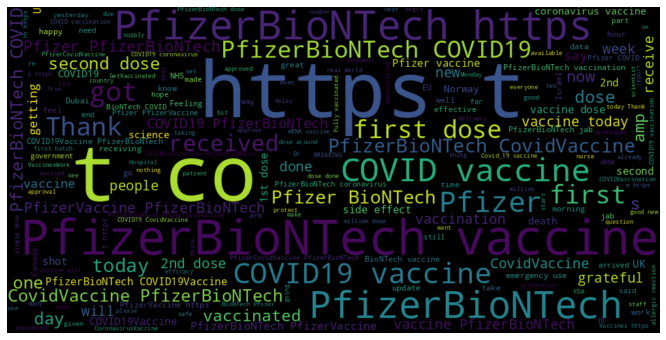

In [40]:
# Simple word-cloud
tweet_df = pfizy_df
words = ' '.join([word for word in tweet_df['text']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

In [42]:
# Advanced word-cloud (positive, negative and neutral separation)
def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)"

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)"

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)"

# Reusable function to generate word clouds
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))

    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
#     plt.show();
    return fig

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    # print(top_n_words)
    return top_n_words

def clean_document(doc):
    spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()

    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]

    # Get the top 10% of all words. This may include "misspelled" words
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words
    misspelled = spell.unknown(doc)

    # Accept the correctly spelled words and top_n words
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]

    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])

    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))

    return clean_words

def get_log_likelihood(doc1, doc2):
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }

    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }

    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }

    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud

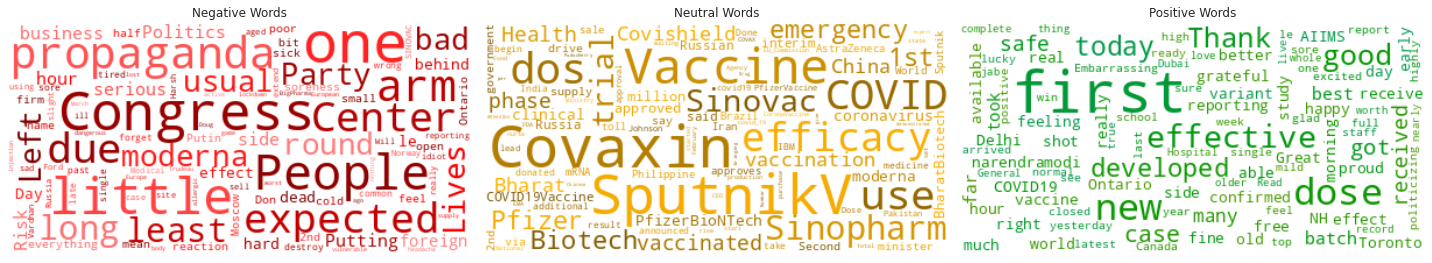

In [45]:
def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['sentiment']=='negative']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['sentiment']=='positive']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['sentiment']=='neutral']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    fig = generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    return fig

# Convert string to a list of words
wordcloud_df = df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("sentiment_wordclouds.png", bbox_inches="tight")

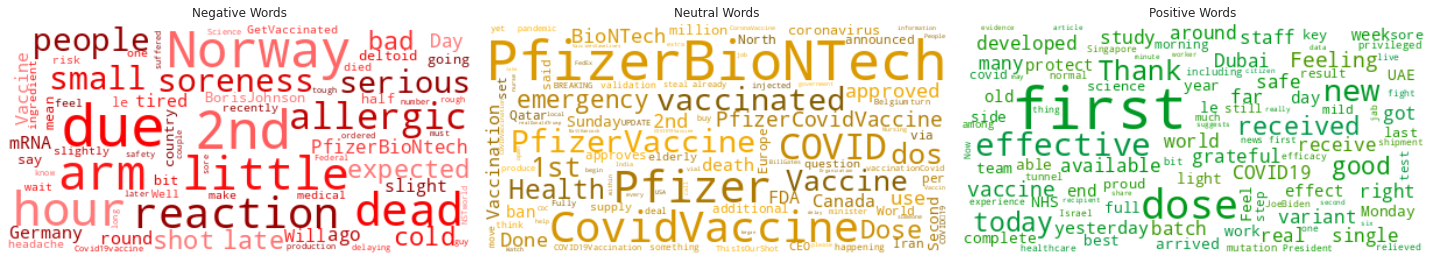

In [46]:
wordcloud_df = pfizy_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("pfizy_sentiment_wordclouds.png", bbox_inches="tight")